### UCB Experiment 3

In [ ]:
print("UCB Experiment 3")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import t
from scipy.stats import uniform
from scipy.stats import ttest_1samp # library for p-value estimation
import ruptures as rpt # library for change point detection
%matplotlib inline
import matplotlib.patheffects as mpe
%run ./Experiment_Functions.ipynb
# load functions for the creation of the different distributions

In [2]:
# define arms
def quick_sort(df):
    sorted_df = df.sort_values(kind="quicksort")
    return sorted_df
def merge_sort(df):
    sorted_df = df.sort_values(kind="mergesort")
    return sorted_df
def heap_sort(df):
    sorted_df = df.sort_values(kind="heapsort")
    return sorted_df

In [3]:
choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quick_sort","merge_sort","heap_sort"]
dist_types = ["Uniform","Normal","Uniform_Sorted","Uniform_Reverse_Sorted","Uniform_Nearly_Sorted","Zipf", "Dates", "Strings", "Discrete_Uniform", "Discrete_Binomial", "Poisson"]

In [4]:
# Define different number of samples for different experiments
n_samples_1e5 = 100000
n_samples_5e4 = 50000
n_samples_5e5 = 500000

In [5]:
# Define the settings of  the 5 different experimental set-ups
list_distributions_1 = 1000*["Discrete_Uniform"] + 1000*["Uniform_Sorted"] 
# list_distributions_1 with n_samples_1e5
list_distributions_2 = 50*["Discrete_Uniform"] +  50*["Uniform_Sorted"]  
# list_distributions_2 with n_samples_5e5
list_distributions_3 = 1000*["Discrete_Uniform"] +  1000*["Uniform_Sorted"] + 1000*["Discrete_Binomial"] + 1000*["Uniform_Reverse_Sorted"]
# list_distributions_3 with n_samples_5e4
list_distributions_4 = 100*["Uniform_Sorted"] +  50*["Poisson"] + 100*["Uniform_Reverse_Sorted"] + 50*["Zipf"]
# list_distributions_4 with n_samples_1e5
list_distributions_5 = 50*["Uniform_Sorted"] +  50*["Poisson"] + 50*["Uniform_Reverse_Sorted"] + 50*["Zipf"] +  50*["Uniform_Reverse_Sorted"] + 50*["Discrete_Uniform"]
# list_distributions_5 with n_samples_1e5

In [6]:
def plot_history(rewards,cum_rewards,chosen_arms):

    fig = plt.figure(figsize=[16,6])
    ax2 = fig.add_subplot(121)
    ax2.plot(cum_rewards, label="avg rewards")
    ax2.set_title("Cummulative Rewards",fontsize=18)
    ax2.set_ylabel('Reward (multiplied by -1)',fontsize=16)
    ax2.set_xlabel('Iteration',fontsize=16)
    plt.setp(ax2.get_xticklabels(), fontsize=14)
    plt.setp(ax2.get_yticklabels(), fontsize=14)
    labels = list(chosen_arms.keys())
    ax3 = fig.add_subplot(122)
    ax3.bar(chosen_arms.keys(), chosen_arms.values())
    ax3.set_title("Chosen Actions",fontsize=18)
    ax3.set_ylabel('Frequency',fontsize=16)
    ax3.set_xlabel('Action',fontsize=16)
    plt.setp(ax3.get_xticklabels(), fontsize=14)
    plt.setp(ax3.get_yticklabels(), fontsize=14)

In [7]:
def plot_history_iterations(history):
    df = pd.DataFrame.from_records(history,columns=["Iteration","Reward","Algorithm"])
    df["Reward"] = df["Reward"]*(-1)
    groups = df.groupby('Algorithm')
    # Plot
    x_values_1 = [0, 999]
    y_values_1 = [0.0029529660000000035,0.0029529660000000035]
    x_values_2 = [1000, 1999]
    y_values_2 = [0.0014058839999997019,0.0014058839999997019]
    x_values_3 = [2000, 2999]
    y_values_3 = [0.0032533940000000427,0.0032533940000000427]
    x_values_4 = [3000, 4000]
    y_values_4 = [0.001498653999999604,0.001498653999999604]
    dict_colors = {"quick_sort":'#1f77b4', "merge_sort":'#ff7f0e', "heap_sort":'#2ca02c'}
    plt.figure(figsize=(16,6))
    for name, group in groups:
        plt.plot(group.Iteration, group.Reward, marker='o', linestyle='', ms=10, alpha = 0.5, label=name, color=dict_colors[name])
    plt.plot(x_values_1, y_values_1, marker = 'o', markersize=10, color = '#1f77b4', linewidth=1, label="Optimal Solution Quick Sort", path_effects= [mpe.Stroke(linewidth=3, foreground='black')], alpha = 0.5)
    plt.plot(x_values_2, y_values_2, marker = 'o', markersize=10, color = '#ff7f0e', linewidth=1, label="Optimal Solution Merge Sort", path_effects= [mpe.Stroke(linewidth=3, foreground='black')], alpha = 0.5)
    plt.plot(x_values_3, y_values_3, marker = 'o', markersize=10, color = '#1f77b4', linewidth=1, path_effects= [mpe.Stroke(linewidth=3, foreground='black')], alpha = 0.5)
    plt.plot(x_values_4, y_values_4, marker = 'o', markersize=10, color = '#ff7f0e', linewidth=1, path_effects= [mpe.Stroke(linewidth=3, foreground='black')], alpha = 0.5)
    
    plt.legend(fontsize=26, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Algorithm choices during experiment",fontsize=26)
    plt.ylabel("Runtime in seconds",fontsize=26)
    plt.xlabel("Iteration",fontsize=26)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

In [8]:
def plot_rewards_distribution_together(arm_rewards, bins = 20):
    for key in arm_rewards:    
        arm_rewards[key] = [i * (-1) for i in arm_rewards[key]]
    #arm_rewards["quick_sort"] = arm_rewards["quick_sort"]*(-1)
    #arm_rewards["merge_sort"] = arm_rewards["merge_sort"]*(-1)
    #arm_rewards["heap_sort"] = arm_rewards["heap_sort"]*(-1)
    plt.figure(figsize=(16,6))
    _, bin_edges_qs = np.histogram(arm_rewards["quick_sort"], density=True)
    _, bin_edges_ms = np.histogram(arm_rewards["merge_sort"], density=True)
    _, bin_edges_hs = np.histogram(arm_rewards["heap_sort"], density=True)
    plt.hist(arm_rewards["quick_sort"], bins=bin_edges_qs, alpha = 0.5, label='quick sort')
    plt.hist(arm_rewards["merge_sort"], bins=bin_edges_ms, alpha = 0.5, label='merge sort')
    plt.hist(arm_rewards["heap_sort"], bins=bin_edges_hs, alpha = 0.5, label='heap sort')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) ,fontsize=26)
    plt.title("Distribution of runtimes during experiment",fontsize=26)
    plt.ylabel("Frequency",fontsize=26)
    plt.xlabel("Runtime in seconds",fontsize=26)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

In [9]:
# help function to return the humber of consecutive elements in a list 
def count_consec(listrand):
    count=1
    consec_list=[]
    for i in range(len(listrand[:-1])):
        if listrand[i]+1 == listrand[i+1]:
            count+=1
        else:
            consec_list.append(count)
            count=1

    # Account for the last iteration
    consec_list.append(count)     

    return consec_list

In [10]:
def ucb(list_distributions, n_samples, num_consec_elem=1, bound_const=0.001, quantile=0.025, list_length=5):
    total_reward = 0
    arm_rewards = {"quick_sort": [], "merge_sort": [], "heap_sort": []}  
    arm_rewards_temp = {"quick_sort": [], "merge_sort": [], "heap_sort": []}  
    arm_counts = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0}  
    arm_counts_temp = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0}
    ucb_values = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0}  
    rewards = []
    cum_rewards = []
    num_choices = len(choices)
    bound_const = bound_const
    n_consecutive_list = []
    num_consec_elem = num_consec_elem
    iter_num = 0
    iteration = 0
    history = []
    number_of_restarts = 0
    restarts = []
    for n, elem in enumerate(list_distributions):
        dist_type = elem
        distribion = create_df_distribution(n_samples=n_samples, dist_type=dist_type)
        for i in (choices_names):
                if arm_counts_temp[i] > 0: 
                    average_reward = np.mean(arm_rewards_temp[i])
                    #print("av_reward", average_reward, "for", choices_names[i])
                    delta_i = bound_const*math.sqrt(2 * math.log(iter_num) / arm_counts_temp[i])
                    #print("delta_i", delta_i, "for", choices_names[i])
                    ucb_values[i] = average_reward + delta_i
                elif arm_counts_temp[i] == 0:
                    ucb_values[i] = 1e500
        choice = max(ucb_values, key=ucb_values.get)
        alg = choices[list(ucb_values.keys()).index(choice)]
        start_time = time.perf_counter()
        sorted_dist = alg(distribion[dist_type])
        exeuction_time = time.perf_counter() - start_time
        reward = exeuction_time*(-1)
        arm_rewards[choice].append(reward)
        arm_rewards_temp[choice].append(reward)
        arm_counts[choice] += 1
        arm_counts_temp[choice] += 1
        total_reward += reward
        rewards.append(reward)
        iter_num += 1
        cum_rewards.append(sum(rewards)/len(rewards))
        if len(arm_rewards_temp[choice])>list_length:
            if reward < np.quantile(arm_rewards_temp[choice][:-1], quantile) or reward > np.quantile(arm_rewards_temp[choice][:-1], (1-quantile)):
                n_consecutive_list.append(n)
                if any(i >= num_consec_elem for i in count_consec(n_consecutive_list)):
                    number_of_restarts += 1
                    arm_rewards_temp = {"quick_sort": [], "merge_sort": [], "heap_sort": []}  
                    arm_counts_temp = {"quick_sort": 0, "merge_sort": 0, "heap_sort":0}  
                    n_consecutive_list = []
                    iter_num = 0
                    restarts.append(iteration)
        iteration+=1
        history.append([iteration, reward,choice])
    return total_reward, arm_rewards, arm_counts, cum_rewards, rewards, history, number_of_restarts, restarts

# For each setting we are going  to try out different values fo the parameters num_consec_elem and quantile:
### num_consec_elem = 1,3,5
### quantile = 0.05, 0.025, 0.005

## Setting 3:
### list_distributions_3 = 1000*["Discrete_Uniform"] +  1000*["Uniform_Sorted"] + 1000*["Discrete_Binomial"] + 1000*["Uniform_Reverse_Sorted"]
### list_distributions_3 with n_samples_5e4

#### num_consec_elem = 1, quantile = 0.05

Total reward -11.956156500001214
Number of restarts 367 in iterations: [11, 19, 29, 41, 49, 62, 72, 80, 90, 109, 117, 125, 133, 141, 151, 159, 168, 177, 186, 194, 204, 212, 220, 230, 239, 252, 261, 271, 279, 287, 299, 311, 323, 331, 341, 349, 357, 370, 378, 387, 396, 404, 414, 428, 439, 455, 463, 471, 484, 493, 502, 511, 520, 528, 539, 547, 558, 568, 576, 589, 597, 605, 615, 624, 633, 644, 657, 665, 676, 684, 698, 706, 715, 726, 735, 752, 761, 774, 782, 791, 803, 812, 823, 834, 843, 851, 860, 880, 892, 901, 909, 918, 927, 936, 944, 978, 986, 996, 1004, 1015, 1025, 1035, 1045, 1053, 1063, 1076, 1086, 1096, 1112, 1123, 1131, 1146, 1159, 1179, 1189, 1201, 1213, 1223, 1234, 1245, 1257, 1272, 1281, 1292, 1302, 1314, 1326, 1336, 1348, 1358, 1370, 1388, 1399, 1409, 1419, 1429, 1443, 1454, 1466, 1476, 1493, 1503, 1513, 1523, 1537, 1547, 1557, 1569, 1579, 1589, 1600, 1615, 1627, 1654, 1671, 1682, 1694, 1704, 1713, 1724, 1735, 1745, 1753, 1762, 1771, 1782, 1795, 1804, 1824, 1834, 1846, 1856, 186

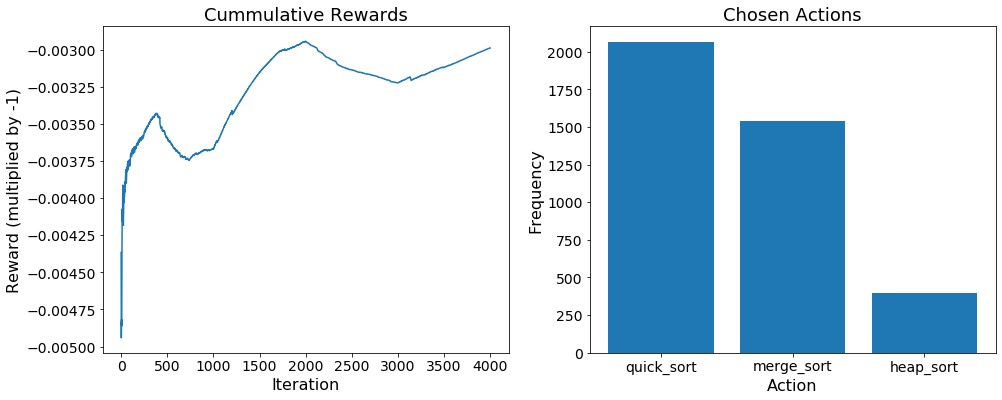

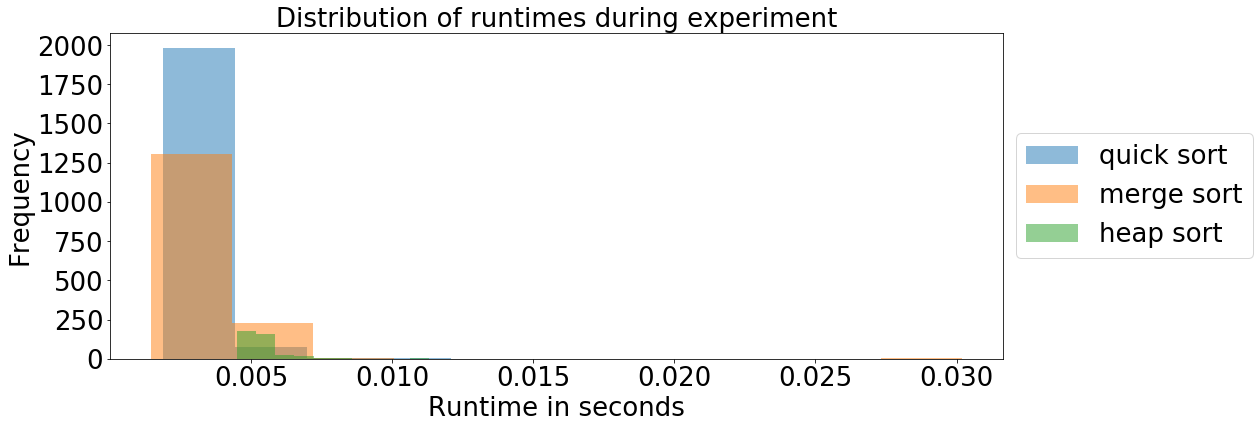

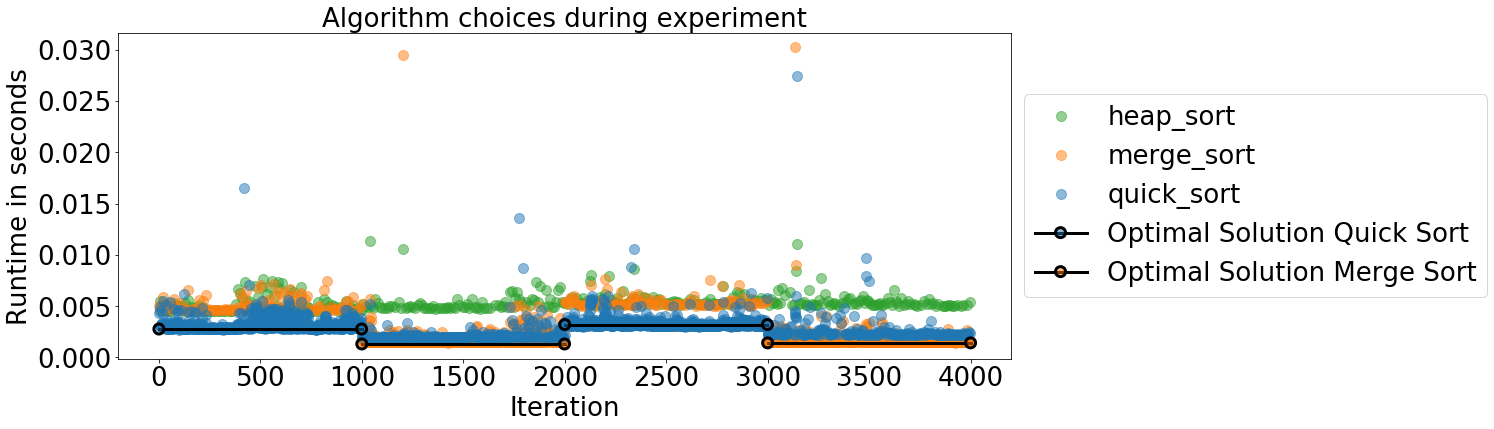

In [11]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 1,quantile = 0.05)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)

#### num_consec_elem = 1, quantile = 0.025

Total reward -12.31615120000015
Number of restarts 335 in iterations: [10, 19, 29, 50, 58, 70, 93, 106, 118, 135, 173, 182, 190, 198, 207, 223, 233, 241, 249, 261, 273, 287, 303, 318, 328, 338, 348, 363, 371, 397, 405, 413, 423, 433, 443, 452, 461, 469, 477, 487, 495, 529, 539, 547, 565, 573, 583, 593, 601, 611, 621, 630, 644, 653, 662, 671, 689, 697, 706, 715, 723, 740, 750, 758, 767, 777, 786, 794, 804, 818, 827, 841, 849, 861, 869, 877, 887, 895, 917, 925, 977, 985, 993, 1001, 1012, 1047, 1060, 1069, 1086, 1096, 1105, 1116, 1126, 1136, 1150, 1172, 1182, 1198, 1208, 1219, 1234, 1246, 1259, 1271, 1291, 1302, 1312, 1328, 1337, 1349, 1359, 1374, 1385, 1394, 1412, 1430, 1438, 1454, 1474, 1486, 1497, 1518, 1527, 1543, 1551, 1561, 1569, 1579, 1588, 1598, 1619, 1632, 1643, 1657, 1665, 1677, 1691, 1701, 1711, 1728, 1739, 1754, 1782, 1794, 1809, 1823, 1832, 1842, 1851, 1861, 1874, 1884, 1894, 1903, 1914, 1928, 1938, 1955, 1965, 1976, 1994, 2006, 2047, 2077, 2087, 2095, 2104, 2112, 2120, 2128,

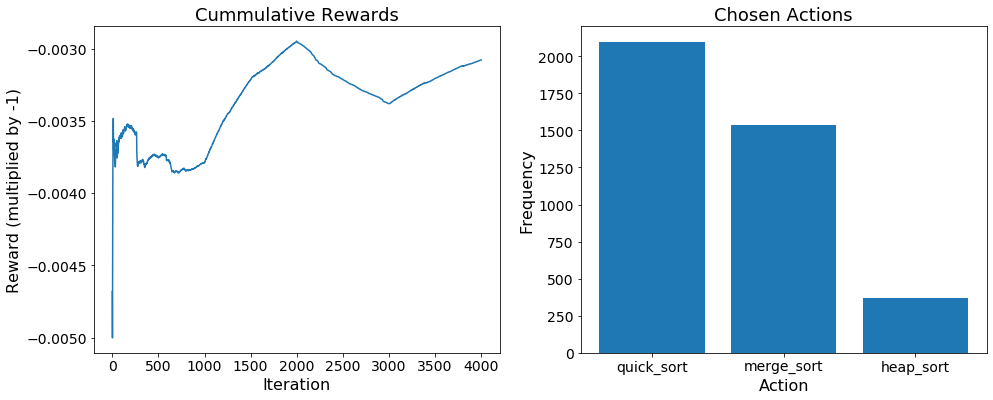

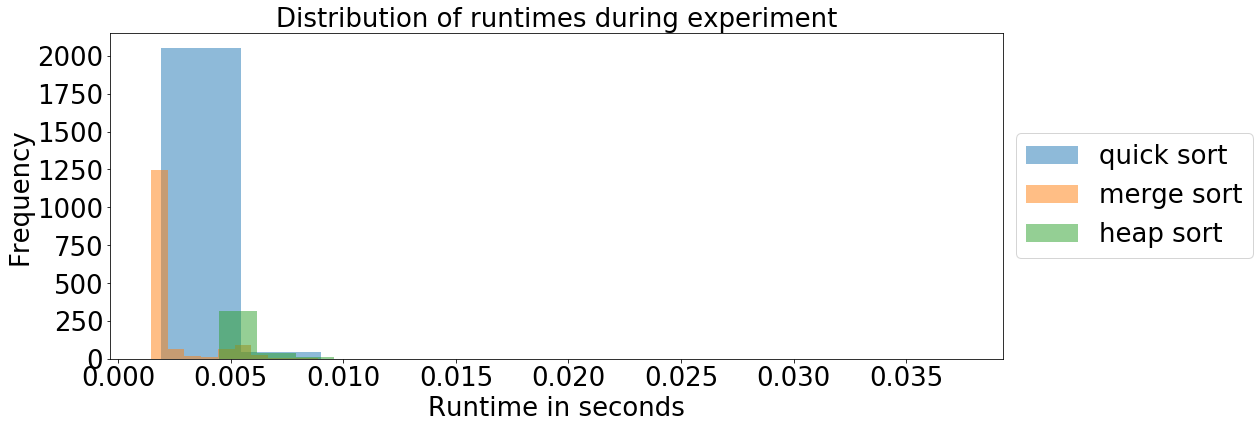

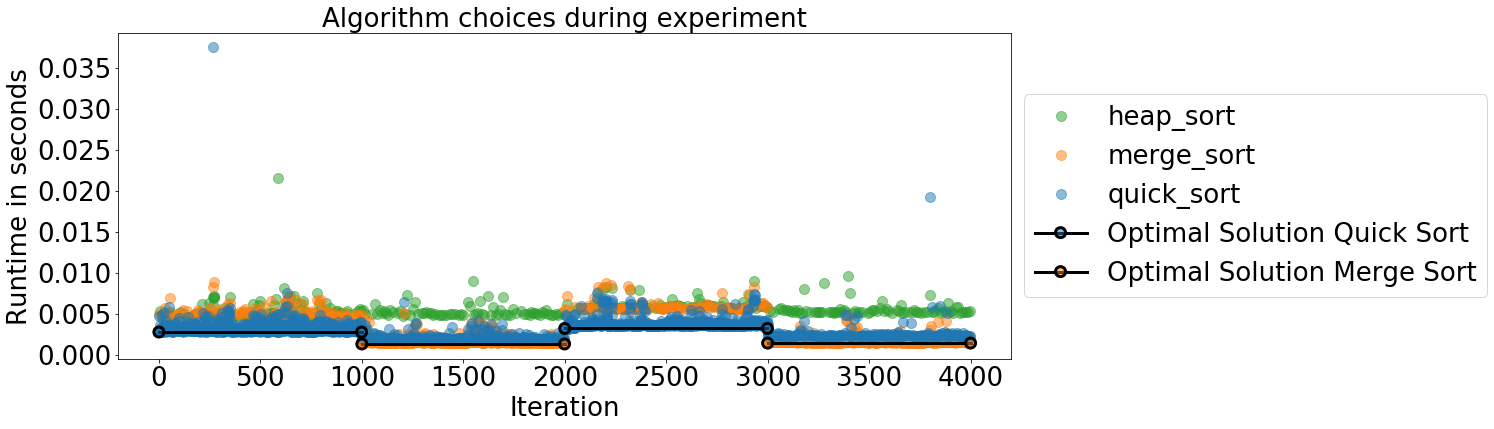

In [12]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 1,quantile = 0.025)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)

#### num_consec_elem = 1, quantile = 0.005

Total reward -13.618668299999058
Number of restarts 341 in iterations: [8, 16, 26, 55, 63, 72, 81, 91, 101, 109, 126, 134, 149, 168, 180, 188, 199, 218, 227, 236, 245, 254, 264, 278, 286, 294, 303, 312, 326, 335, 344, 352, 360, 372, 390, 400, 409, 417, 426, 443, 451, 460, 469, 477, 486, 495, 509, 517, 526, 534, 543, 558, 580, 588, 596, 607, 621, 633, 649, 665, 673, 684, 698, 706, 714, 724, 732, 742, 766, 774, 784, 793, 805, 815, 825, 834, 842, 850, 859, 867, 876, 889, 897, 905, 913, 921, 929, 941, 956, 964, 980, 990, 1000, 1013, 1026, 1035, 1046, 1058, 1069, 1080, 1090, 1099, 1110, 1118, 1129, 1141, 1154, 1168, 1183, 1191, 1202, 1210, 1231, 1239, 1250, 1260, 1270, 1279, 1291, 1299, 1308, 1318, 1326, 1334, 1342, 1366, 1391, 1401, 1412, 1427, 1437, 1452, 1473, 1483, 1493, 1501, 1510, 1530, 1538, 1547, 1558, 1572, 1583, 1633, 1648, 1661, 1674, 1747, 1756, 1772, 1790, 1800, 1808, 1818, 1827, 1836, 1844, 1863, 1873, 1883, 1894, 1903, 1913, 1921, 1930, 1948, 1962, 1972, 2000, 2008, 2019, 202

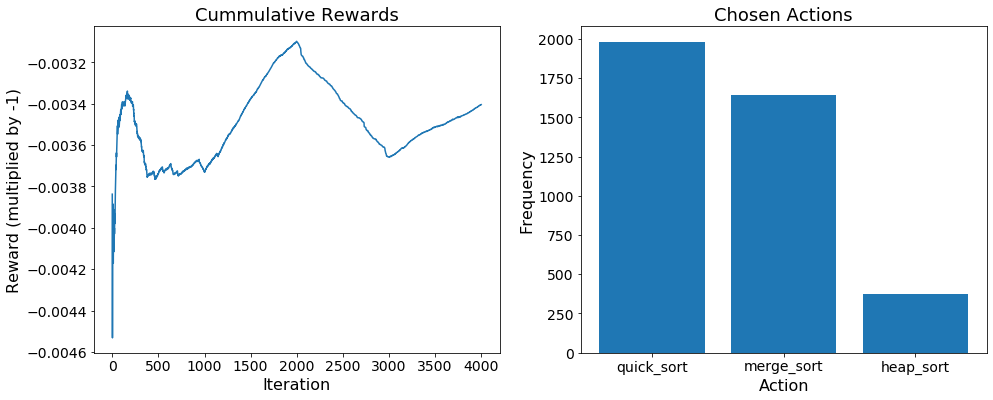

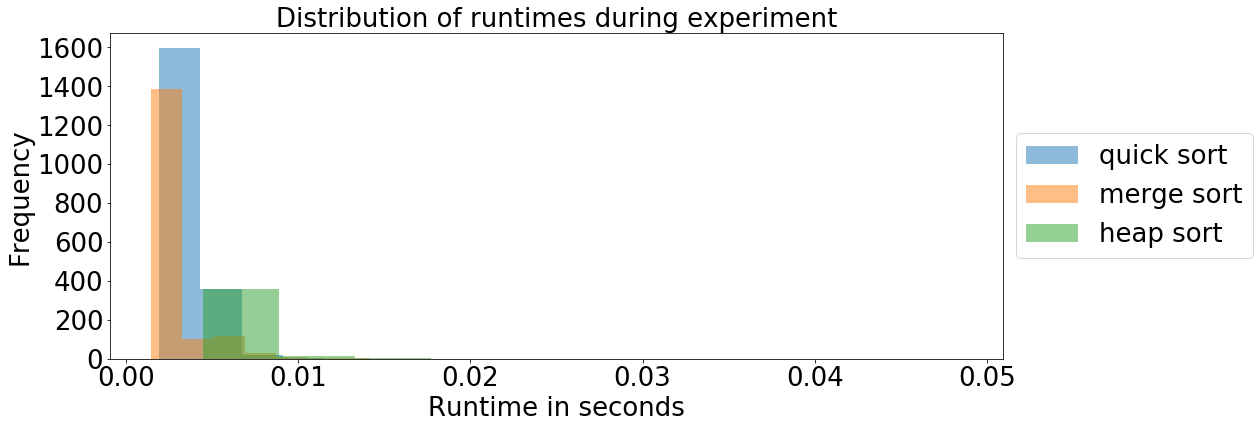

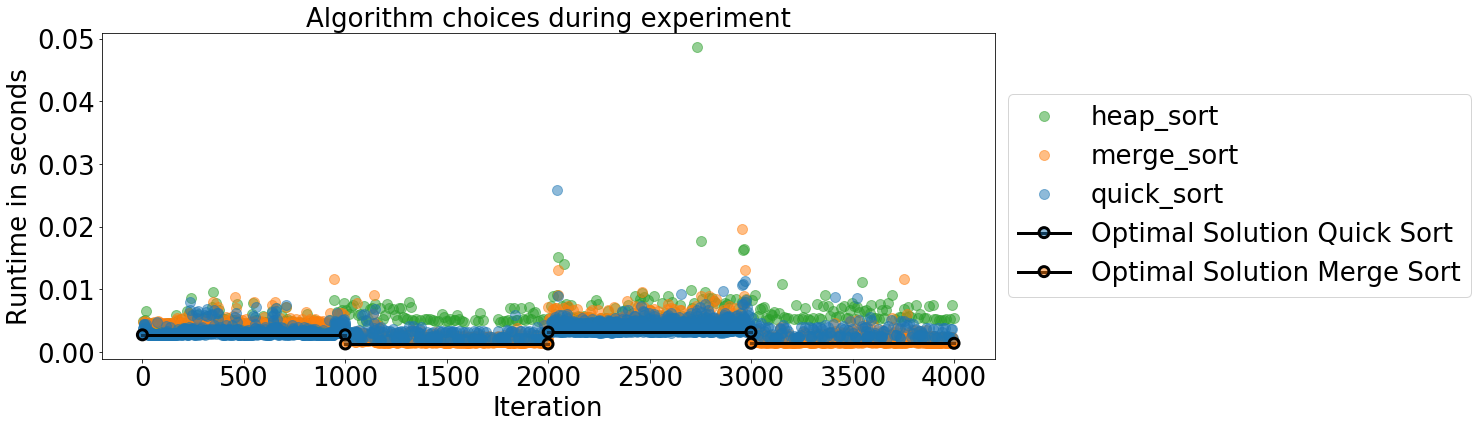

In [13]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 1,quantile = 0.005)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)

#### num_consec_elem = 3, quantile = 0.05

Total reward -10.715060200000494
Number of restarts 19 in iterations: [11, 281, 364, 753, 1002, 1188, 2002, 2098, 2125, 2440, 2524, 2810, 2821, 3002, 3289, 3360, 3408, 3418, 3799]


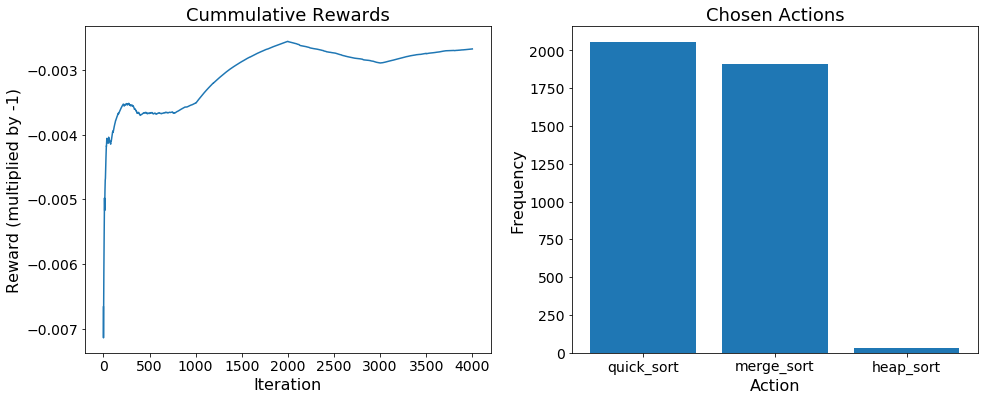

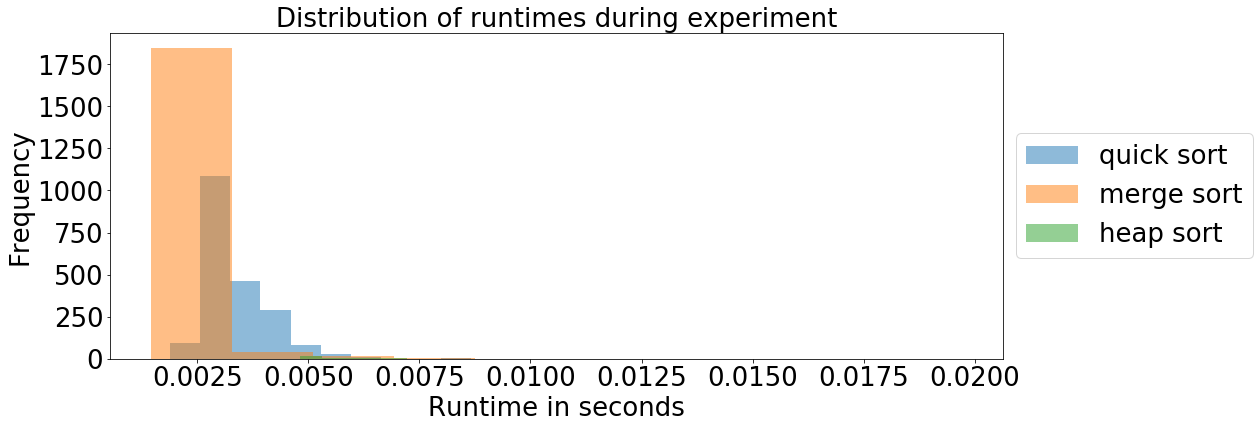

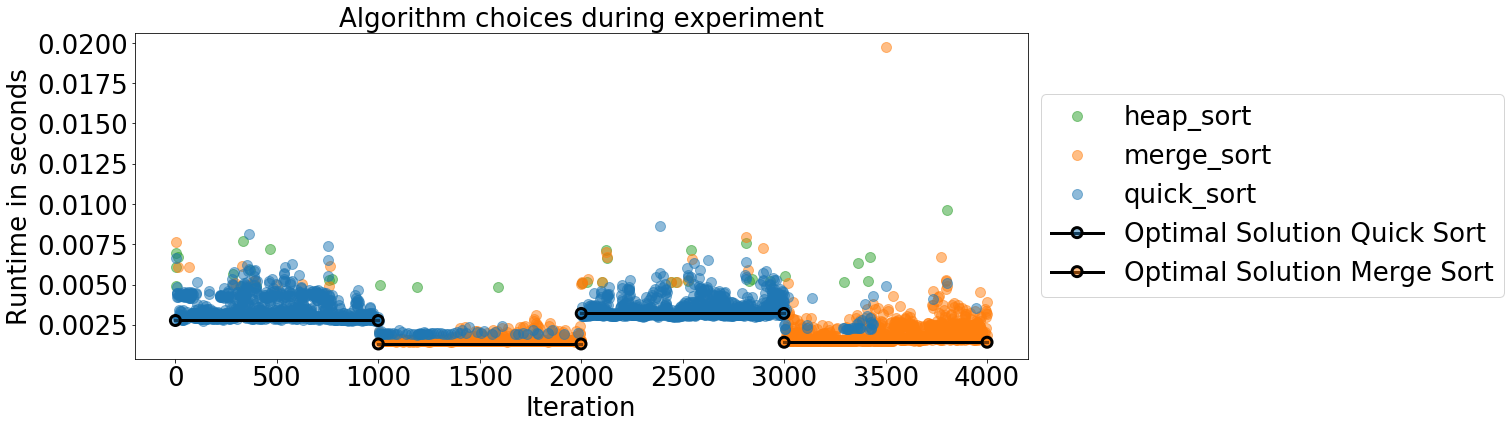

In [14]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 3,quantile = 0.05)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)

#### num_consec_elem = 3, quantile = 0.025

Total reward -11.15403429999617
Number of restarts 5 in iterations: [1005, 1084, 1120, 2002, 3002]


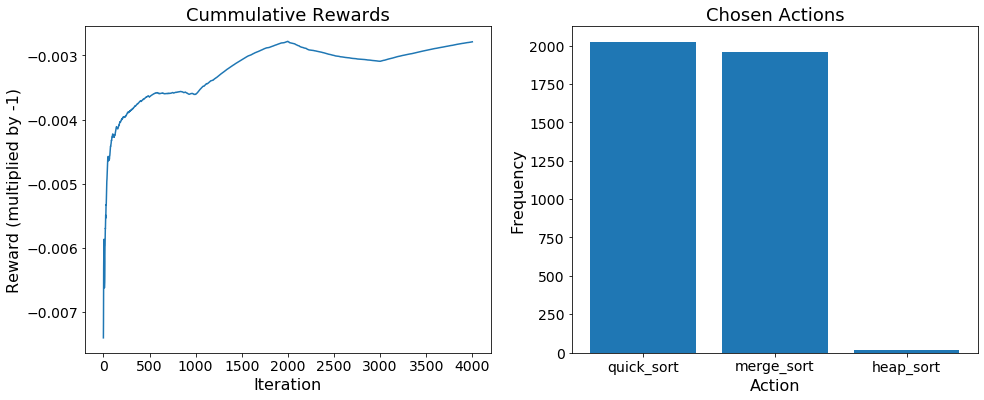

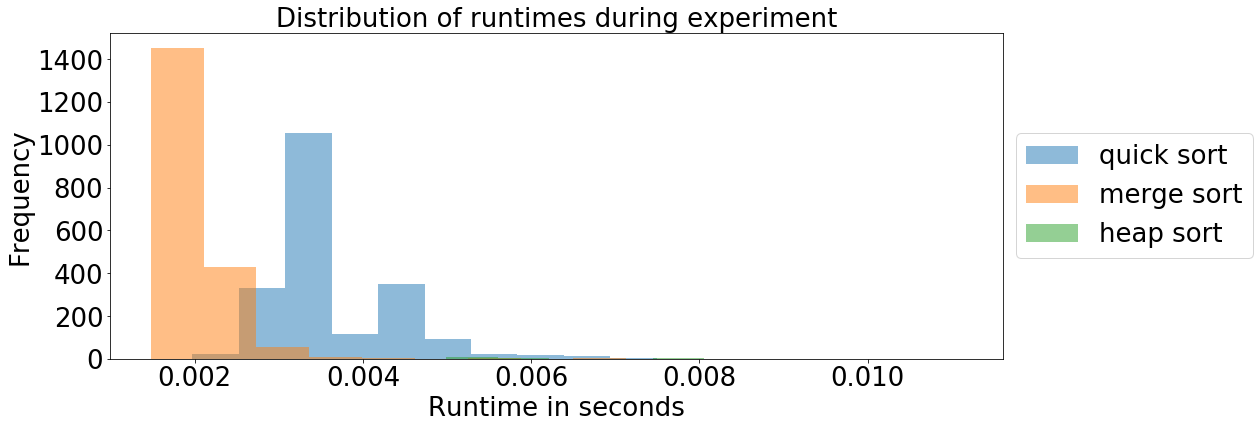

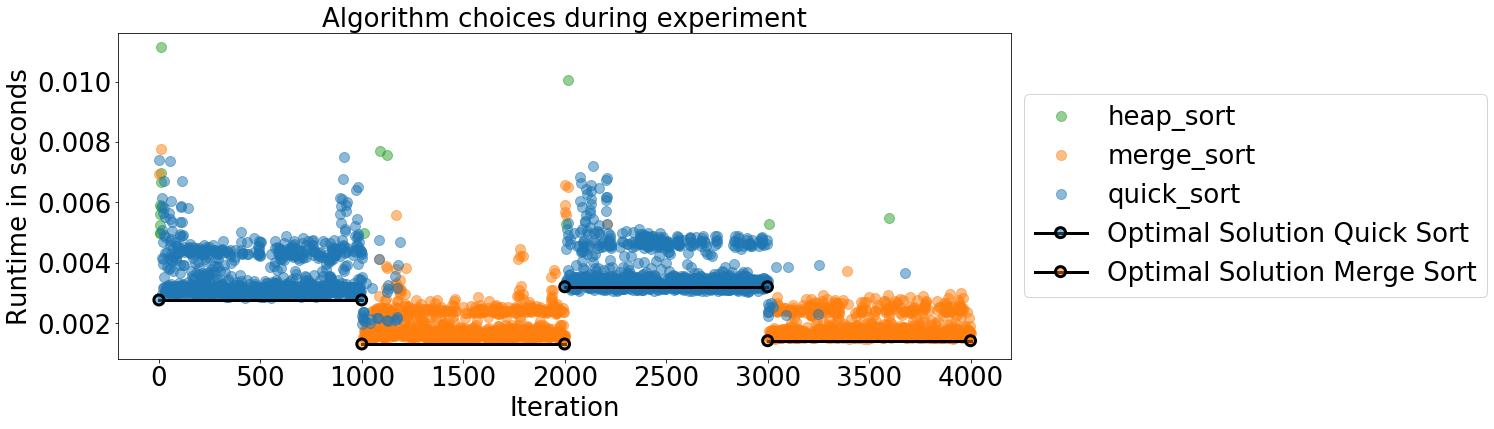

In [15]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 3,quantile = 0.025)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)

#### num_consec_elem = 3, quantile = 0.005

Total reward -10.562908900001958
Number of restarts 5 in iterations: [53, 1002, 2000, 2621, 3013]


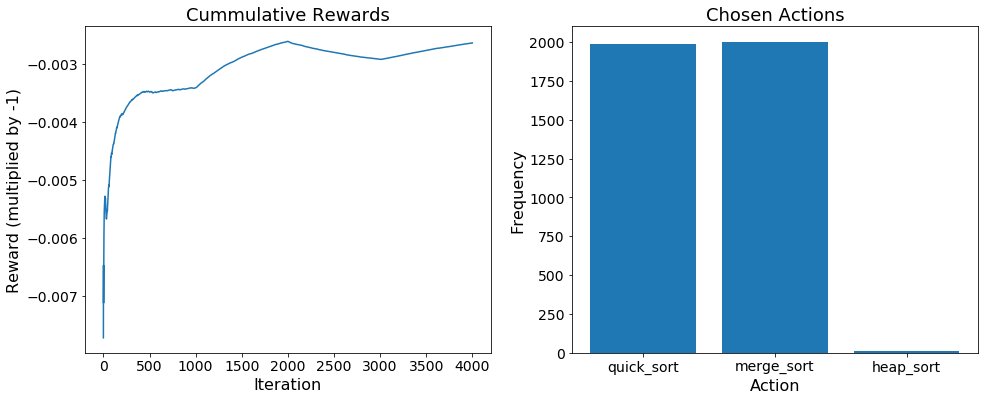

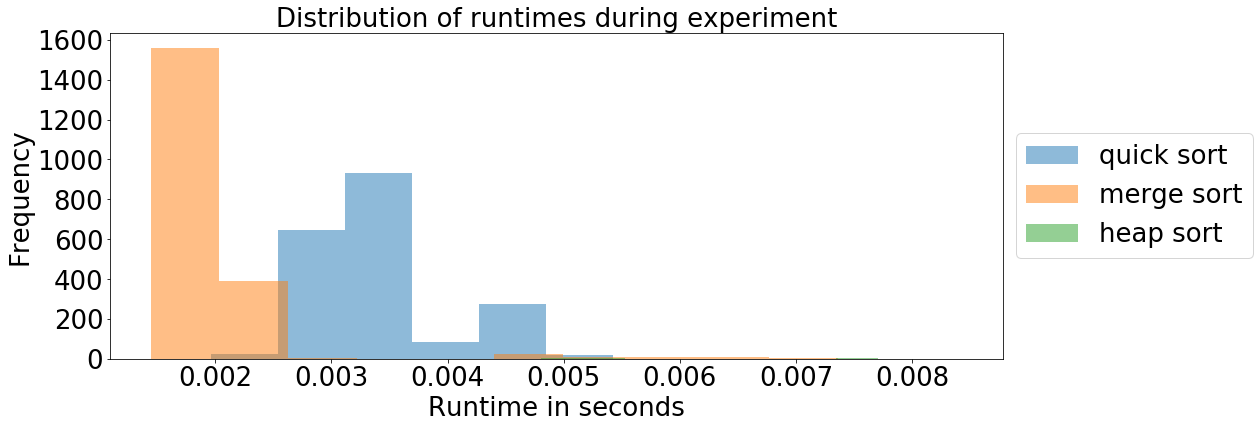

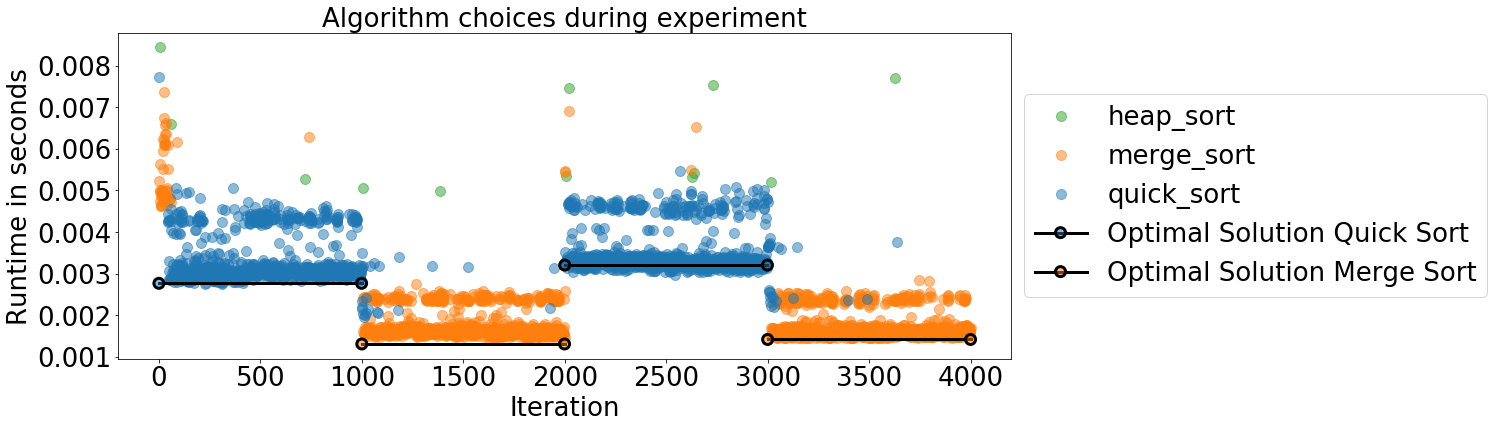

In [16]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 3,quantile = 0.005)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)

#### num_consec_elem = 5, quantile = 0.025

Total reward -10.179094000002578
Number of restarts 4 in iterations: [724, 1023, 2004, 3004]


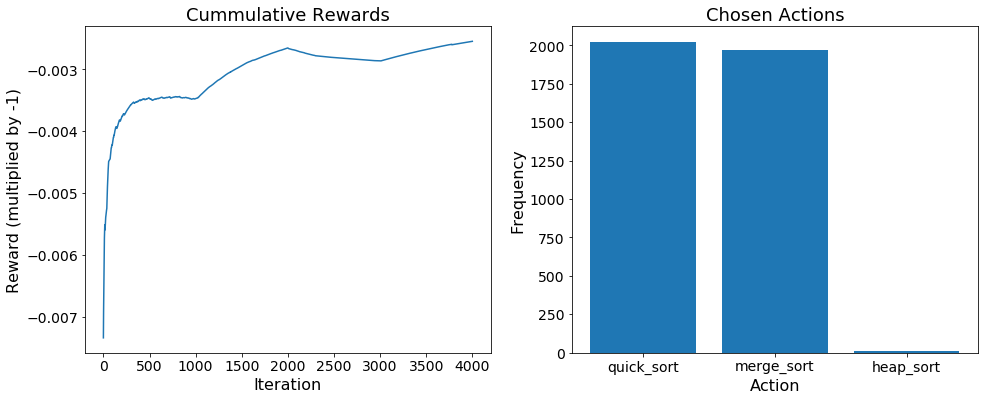

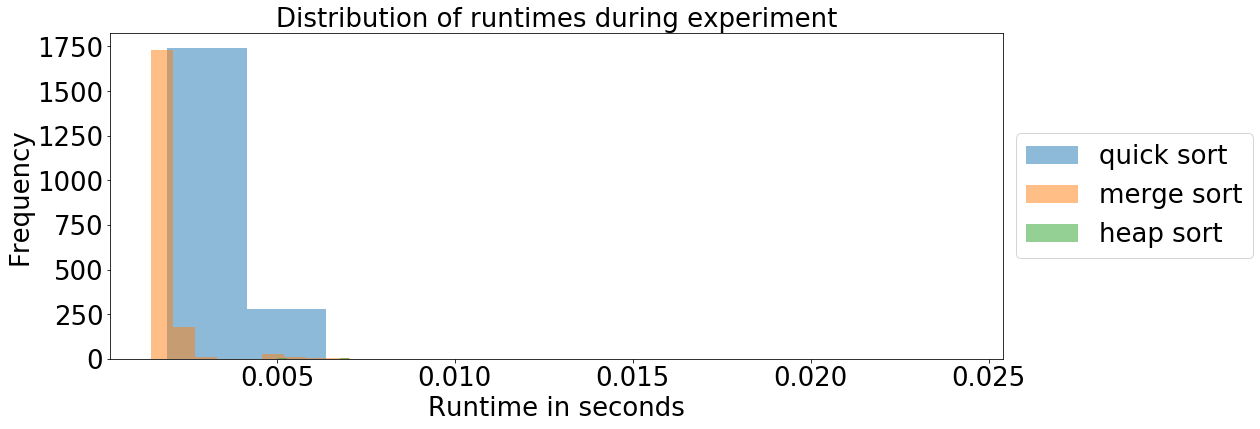

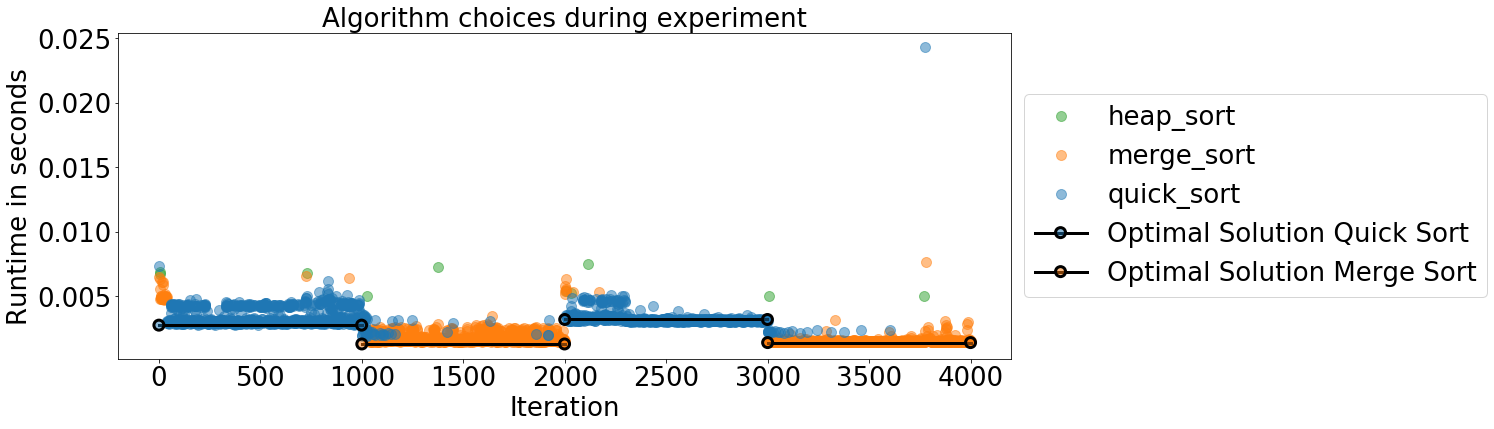

In [17]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 5,quantile = 0.025)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)

#### num_consec_elem = 5, quantile = 0.005

Total reward -9.145927599995275
Number of restarts 3 in iterations: [1004, 2004, 3004]


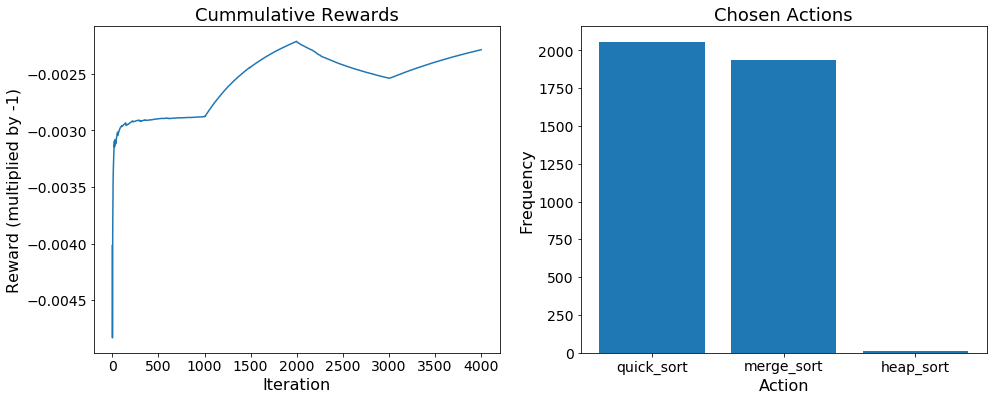

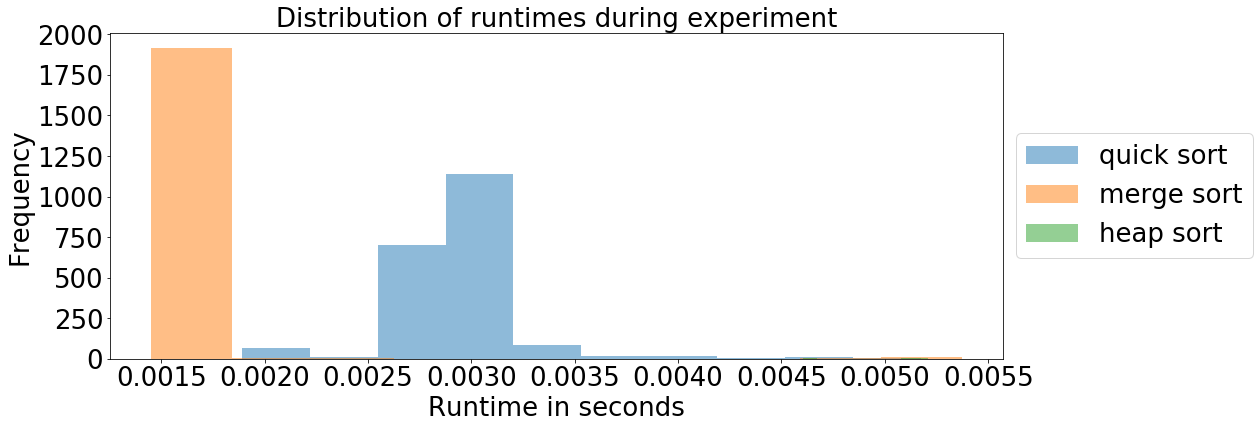

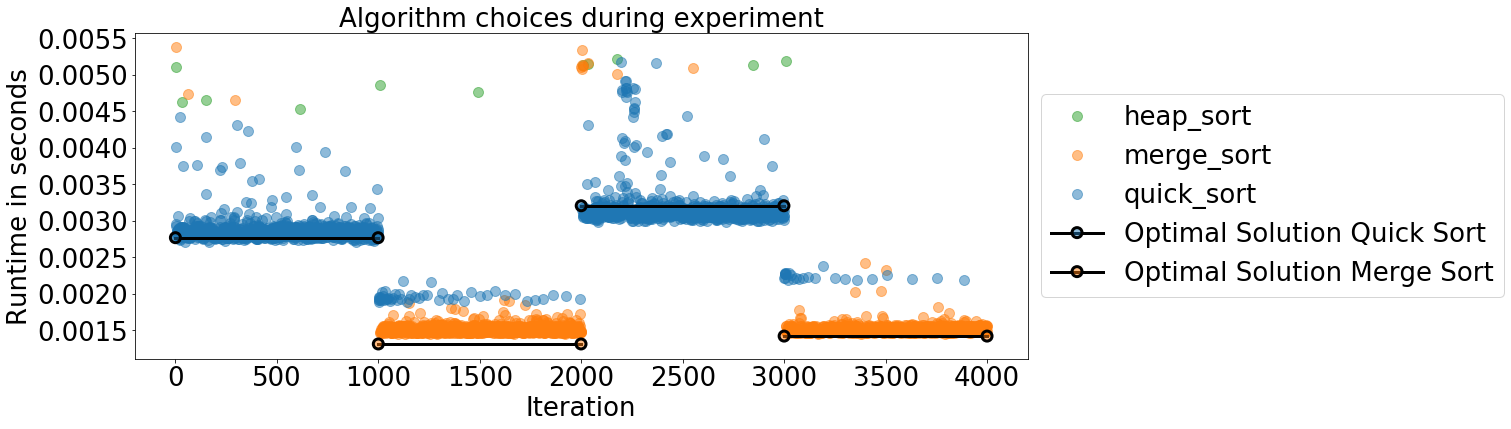

In [18]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 5,quantile = 0.005)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)

#### num_consec_elem = 5, quantile = 0.05

Total reward -9.356780899999876
Number of restarts 4 in iterations: [351, 1004, 2003, 3004]


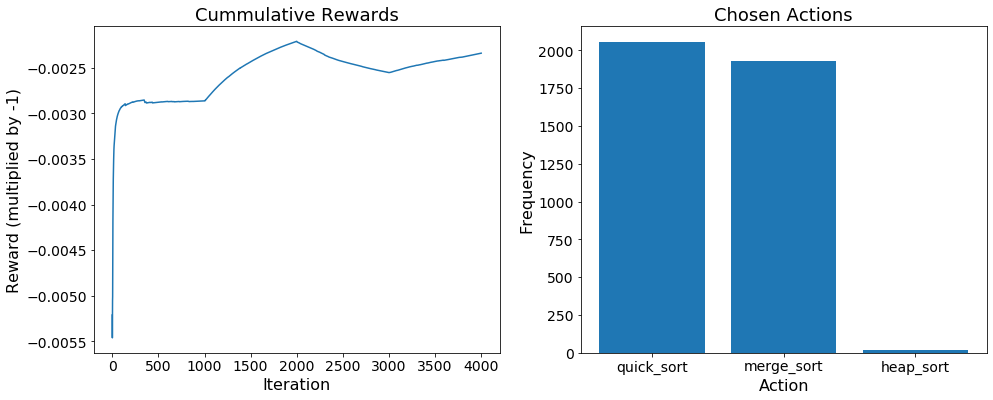

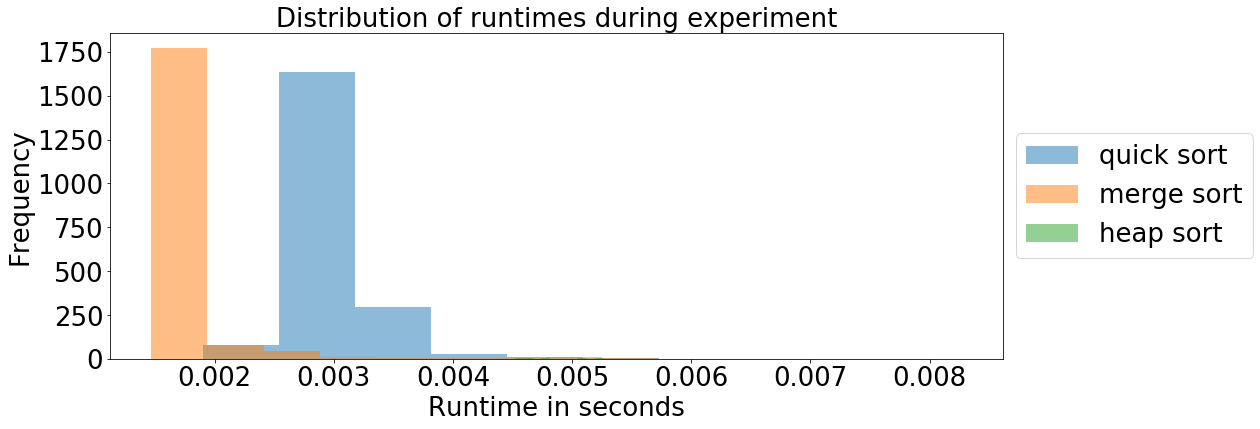

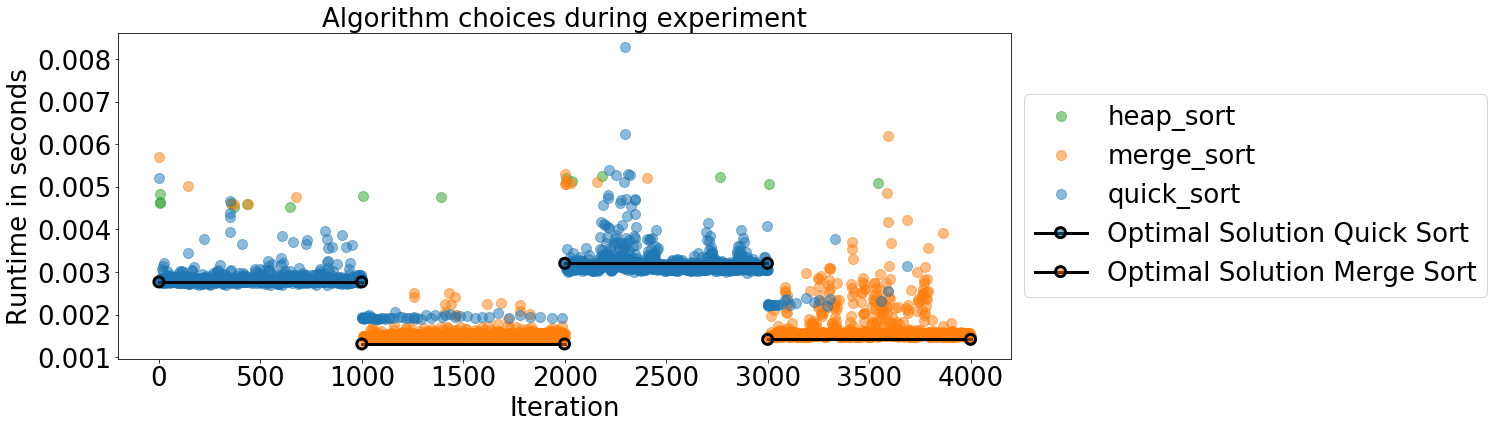

In [19]:
total_reward, arm_rewards, arm_counts, cum_rewards, rewards,history, number_of_restarts, restarts = ucb(list_distributions_3, n_samples_5e4, num_consec_elem = 5,quantile = 0.05)
plot_history(rewards,cum_rewards, arm_counts)
plot_rewards_distribution_together(arm_rewards)
plot_history_iterations(history)
print("Total reward", total_reward)
print("Number of restarts", number_of_restarts, "in iterations:", restarts)